Source: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py


Generally, when you have to deal with image, text, audio or video data, you can use standard python packages that load data into a numpy array. Then you can convert this array into a `torch.*Tensor`.

For images, packages such as `Pillow`, `OpenCV` are useful
For audio, packages such as `scipy` and `librosa`
For text, either raw Python or Cython based loading, or `NLTK` and `SpaCy` are useful
Specifically for vision, we have created a package called `torchvision`, that has data loaders for common datasets such as Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz., `torchvision.datasets` and `torch.utils.data.DataLoader`.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the `CIFAR10` dataset. It has the classes: `‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’`. The images in `CIFAR-10` are of size `3x32x32`, i.e. 3-channel color images of 32x32 pixels in size.
![CIFAR-10](https://pytorch.org/tutorials/_images/cifar10.png)

## Training an image classifier
We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using `torchvision`
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data


## 1. Loading and normalizing `CIFAR10`

In [27]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range `[0, 1]`. We transform them to Tensors of normalized range `[-1, 1]`. .. note:

In [28]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), 
])
transform

Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

In [29]:
# Downloading the dataset
train_ds = torchvision.datasets.CIFAR10(root = './data/', train=True, download = True, transform=transform)
test_ds = torchvision.datasets.CIFAR10(root = './data/', train=False, download = True, transform=transform)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data/
Files already downloaded and verified


In [4]:
# Converting the dataset into a DataLoader
train_dl = torch.utils.data.DataLoader(train_ds, shuffle=True, batch_size= 8, num_workers=2)
test_dl = torch.utils.data.DataLoader(test_ds, shuffle=False, batch_size= 8, num_workers=2)

## Data Visualizations

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(8,1))
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.axis(False)
    plt.show()
    
dataiter = iter(train_dl)
images, labels = dataiter.next()

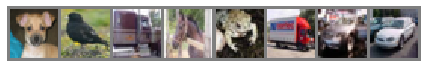

  dog  bird truck horse  frog truck   car   car


In [8]:
collage = torchvision.utils.make_grid(images)
imshow(collage)
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

# 2. Define a Convolutional Neural Network

In [9]:
import torch.nn as nn
import torch.nn.functional as F

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=(2,2))
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

model = Net()

# 3. Define a Loss function and optimizer
Let’s use a Classification Cross-Entropy loss and SGD with momentum.

In [21]:
import torch.optim as optim

loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
epochs = 5

# 4. Train the network
This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [103]:
for epoch in range(epochs):         #One epoch runs over the whole image set
    running_loss = 0.0
    for i, data in enumerate(train_dl, start=0):
        xb, yb = data 
        optimizer.zero_grad()
        
        # Forward  + backward + optimize
        preds = model(xb)
        loss = loss_func(preds, yb)
        loss.backward()
        optimizer.step()
        
        #print statistics
        running_loss += loss.item()
        if i%1000==999:
            print('[Epoch: %d, Batch: %5d] loss: %.3f' %(epoch, i+1, running_loss/1000))
            running_loss = 0.0
print('Finished Training :) ')
        
        
        

[Epoch: 0, Batch:  1000] loss: 1.083
[Epoch: 0, Batch:  2000] loss: 1.085
[Epoch: 0, Batch:  3000] loss: 1.110
[Epoch: 0, Batch:  4000] loss: 1.088
[Epoch: 0, Batch:  5000] loss: 1.101
[Epoch: 0, Batch:  6000] loss: 1.095
[Epoch: 1, Batch:  1000] loss: 1.073
[Epoch: 1, Batch:  2000] loss: 1.070
[Epoch: 1, Batch:  3000] loss: 1.077
[Epoch: 1, Batch:  4000] loss: 1.059
[Epoch: 1, Batch:  5000] loss: 1.076
[Epoch: 1, Batch:  6000] loss: 1.064
[Epoch: 2, Batch:  1000] loss: 1.048
[Epoch: 2, Batch:  2000] loss: 1.063
[Epoch: 2, Batch:  3000] loss: 1.048
[Epoch: 2, Batch:  4000] loss: 1.052
[Epoch: 2, Batch:  5000] loss: 1.038
[Epoch: 2, Batch:  6000] loss: 1.053
[Epoch: 3, Batch:  1000] loss: 1.028
[Epoch: 3, Batch:  2000] loss: 1.006
[Epoch: 3, Batch:  3000] loss: 1.034
[Epoch: 3, Batch:  4000] loss: 1.056
[Epoch: 3, Batch:  5000] loss: 1.045
[Epoch: 3, Batch:  6000] loss: 1.052
[Epoch: 4, Batch:  1000] loss: 1.009
[Epoch: 4, Batch:  2000] loss: 1.021
[Epoch: 4, Batch:  3000] loss: 1.037
[

let us save the model so that next time we can start from here. 

In [104]:
savepath = './cifar-stage1.pth'
torch.save(model.state_dict(), savepath)

# 5. Test the network on the training data
We have trained the network for 2 passes over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.
Okay, first step. Let us display an image from the test set to get familiar.

In [84]:
def grid_show(images, labels, classes, preds = None):
    """
    This function makes grid of images and labels given. 
    Both original labels and predictions can be given. 
    """
    no_of_images = images.shape[0]
    cols = 8
    rows = no_of_images // cols
    # Changing the channels of the image in order to fit it to the matplotlib format view
    images = np.array(images).transpose(0,2,3,1)
    # De Normalizing the images
    images = (images/2 + 0.5)*255
    

    plt.figure(figsize=(cols+3, rows+1))
    index = 0
    for i in range(rows):
        for j in range(cols):
            plt.subplot(rows, cols, index+1)
            plt.imshow(images[index].astype('uint8'))
            if preds is None:
                plt.title(str(classes[labels[index]]))
            else:
                plt.title(str(classes[labels[index]]) + '/' + str(classes[preds[index]]))
            plt.axis(False)
            index +=1
    plt.show()
    

In [87]:
def get_predictions(model, images):
    """
    Inference function for a single batch
    """
    with torch.no_grad():
        _, predicted = torch.max(model(images), 1)
    return predicted.numpy()

In [88]:
def show_predictions(model, test_dl, classes, batches = 1):
    """Function to show the predictions in a grid format for mutiple batches."""
    print('Original/Predicted')
    dataiter = iter(test_dl)
    
    for i in range(batches):
        print('Batch No: ', i+1)
        images, labels = dataiter.next()
        preds = get_predictions(model, images)
        grid_show(images, labels, classes, preds=preds)
        
    
    

Original/Predicted
Batch No:  1


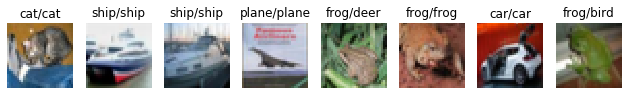

Batch No:  2


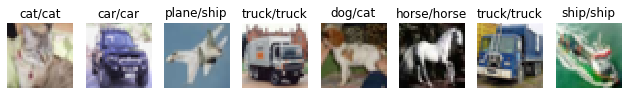

Batch No:  3


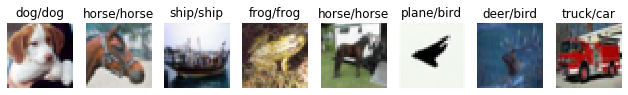

Batch No:  4


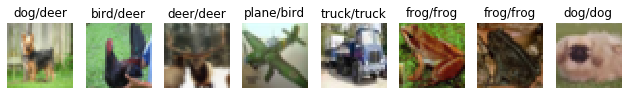

Batch No:  5


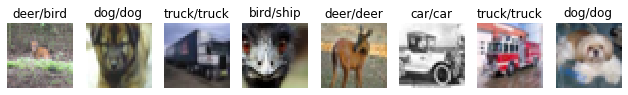

Batch No:  6


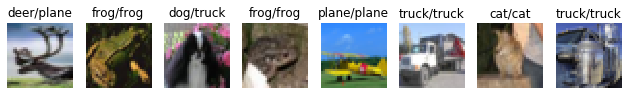

In [83]:
show_predictions(model, test_dl, classes, batches=6)

## Calculating the accuracy over the whole testset
Now let us have a look at the whole dataset and try to find out how our model performs over the dataset. 

In [101]:
def get_accuracy(model, test_dl):
    total, correct = 0.0, 0.0
    
    with torch.no_grad():
        for images, labels in test_dl:
            preds = get_predictions(model, images)
            preds = torch.Tensor(preds)
            
            total += labels.size(0)
            correct += (preds == labels).sum().item()
#         print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
    return 100 * correct / total

In [105]:
get_accuracy(model, test_dl)

62.01

In [108]:
def get_class_accuracy(model, test_dl, classes):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for images, labels in test_dl:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1


    for i in range(10):
        print('Accuracy of %5s : %2d%%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

In [109]:
get_class_accuracy(model, test_dl, classes)

Accuracy of plane : 62%
Accuracy of   car : 78%
Accuracy of  bird : 41%
Accuracy of   cat : 53%
Accuracy of  deer : 57%
Accuracy of   dog : 39%
Accuracy of  frog : 75%
Accuracy of horse : 73%
Accuracy of  ship : 71%
Accuracy of truck : 74%
